# Import Libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt

from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.feature_selection import SelectFromModel

# Import dataset

In [2]:
phishdata = pd.read_csv('dataset_link_phishing.csv')
phishdata.shape

C:\Users\Sharon\AppData\Local\Temp\ipykernel_16420\4156395606.py:1: DtypeWarning: Columns (78) have mixed types. Specify dtype option on import or set low_memory=False.
  phishdata = pd.read_csv('dataset_link_phishing.csv')


(19431, 87)

In [3]:
phishdata.head()

,Unnamed: 0,url,url_length,hostname_length,ip,total_of.,total_of-,total_of@,total_of?,total_of&,...,domain_in_title,domain_with_copyright,whois_registered_domain,domain_registration_length,domain_age,web_traffic,dns_record,google_index,page_rank,status
0,0,http://www.progarchives.com/album.asp?id=61737,46,20,0,3,0,0,1,0,...,1,one,0,627,6678,78526,0,0,5,phishing
1,1,http://signin.eday.co.uk.ws.edayisapi.dllsign....,128,120,0,10,0,0,0,0,...,1,zero,0,300,65,0,0,1,0,phishing
2,2,http://www.avevaconstruction.com/blesstool/ima...,52,25,0,3,0,0,0,0,...,1,zero,0,119,1707,0,0,1,0,phishing
3,3,http://www.jp519.com/,21,13,0,2,0,0,0,0,...,1,one,0,130,1331,0,0,0,0,legitimate
4,4,https://www.velocidrone.com/,28,19,0,2,0,0,0,0,...,0,zero,0,164,1662,312044,0,0,4,legitimate


In [4]:
pd.set_option('display.max_rows', None)
phishdata.info()
pd.set_option('display.max_rows', 10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19431 entries, 0 to 19430
Data columns (total 87 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Unnamed: 0                  19431 non-null  int64  
 1   url                         19431 non-null  object 
 2   url_length                  19431 non-null  int64  
 3   hostname_length             19431 non-null  int64  
 4   ip                          19431 non-null  int64  
 5   total_of.                   19431 non-null  int64  
 6   total_of-                   19431 non-null  int64  
 7   total_of@                   19431 non-null  int64  
 8   total_of?                   19431 non-null  int64  
 9   total_of&                   19431 non-null  int64  
 10  total_of=                   19431 non-null  int64  
 11  total_of_                   19431 non-null  int64  
 12  total_of~                   19431 non-null  int64  
 13  total_of%                   194

# Data Cleaning

In [5]:
phishdata = phishdata.drop_duplicates()
phishdata = phishdata[phishdata.columns[1:]]
phishdata

,url,url_length,hostname_length,ip,total_of.,total_of-,total_of@,total_of?,total_of&,total_of=,...,domain_in_title,domain_with_copyright,whois_registered_domain,domain_registration_length,domain_age,web_traffic,dns_record,google_index,page_rank,status
0,http://www.progarchives.com/album.asp?id=61737,46,20,0,3,0,0,1,0,1,...,1,one,0,627,6678,78526,0,0,5,phishing
1,http://signin.eday.co.uk.ws.edayisapi.dllsign....,128,120,0,10,0,0,0,0,0,...,1,zero,0,300,65,0,0,1,0,phishing
2,http://www.avevaconstruction.com/blesstool/ima...,52,25,0,3,0,0,0,0,0,...,1,zero,0,119,1707,0,0,1,0,phishing
3,http://www.jp519.com/,21,13,0,2,0,0,0,0,0,...,1,one,0,130,1331,0,0,0,0,legitimate
4,https://www.velocidrone.com/,28,19,0,2,0,0,0,0,0,...,0,zero,0,164,1662,312044,0,0,4,legitimate
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19426,http://www.fontspace.com/category/blackletter,45,17,1,2,0,0,0,0,0,...,0,0,0,448,5396,3980,0,0,6,legitimate
19427,http://www.budgetbots.com/server.php/Server%20...,84,18,1,5,0,1,1,0,1,...,1,0,0,211,6728,0,0,1,0,phishing
19428,https://www.facebook.com/Interactive-Televisio...,105,16,1,2,6,0,1,0,1,...,0,0,0,2809,8515,8,0,1,10,legitimate
19429,http://www.mypublicdomainpictures.com/,38,30,1,2,0,0,0,0,0,...,1,0,0,85,2836,2455493,0,0,4,legitimate


In [6]:
phishdata = phishdata[phishdata['domain_age'] >= 0]#clean out the negative value
phishdata

,url,url_length,hostname_length,ip,total_of.,total_of-,total_of@,total_of?,total_of&,total_of=,...,domain_in_title,domain_with_copyright,whois_registered_domain,domain_registration_length,domain_age,web_traffic,dns_record,google_index,page_rank,status
0,http://www.progarchives.com/album.asp?id=61737,46,20,0,3,0,0,1,0,1,...,1,one,0,627,6678,78526,0,0,5,phishing
1,http://signin.eday.co.uk.ws.edayisapi.dllsign....,128,120,0,10,0,0,0,0,0,...,1,zero,0,300,65,0,0,1,0,phishing
2,http://www.avevaconstruction.com/blesstool/ima...,52,25,0,3,0,0,0,0,0,...,1,zero,0,119,1707,0,0,1,0,phishing
3,http://www.jp519.com/,21,13,0,2,0,0,0,0,0,...,1,one,0,130,1331,0,0,0,0,legitimate
4,https://www.velocidrone.com/,28,19,0,2,0,0,0,0,0,...,0,zero,0,164,1662,312044,0,0,4,legitimate
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19425,http://www.answers.com/Q/What_are_the_sizes_of...,62,15,1,2,0,0,0,0,0,...,0,1,0,506,8829,2635,0,1,6,legitimate
19426,http://www.fontspace.com/category/blackletter,45,17,1,2,0,0,0,0,0,...,0,0,0,448,5396,3980,0,0,6,legitimate
19427,http://www.budgetbots.com/server.php/Server%20...,84,18,1,5,0,1,1,0,1,...,1,0,0,211,6728,0,0,1,0,phishing
19428,https://www.facebook.com/Interactive-Televisio...,105,16,1,2,6,0,1,0,1,...,0,0,0,2809,8515,8,0,1,10,legitimate


In [7]:
phishdata = phishdata[phishdata['domain_registration_length'] >= 0]#clean out the negative value
phishdata

,url,url_length,hostname_length,ip,total_of.,total_of-,total_of@,total_of?,total_of&,total_of=,...,domain_in_title,domain_with_copyright,whois_registered_domain,domain_registration_length,domain_age,web_traffic,dns_record,google_index,page_rank,status
0,http://www.progarchives.com/album.asp?id=61737,46,20,0,3,0,0,1,0,1,...,1,one,0,627,6678,78526,0,0,5,phishing
1,http://signin.eday.co.uk.ws.edayisapi.dllsign....,128,120,0,10,0,0,0,0,0,...,1,zero,0,300,65,0,0,1,0,phishing
2,http://www.avevaconstruction.com/blesstool/ima...,52,25,0,3,0,0,0,0,0,...,1,zero,0,119,1707,0,0,1,0,phishing
3,http://www.jp519.com/,21,13,0,2,0,0,0,0,0,...,1,one,0,130,1331,0,0,0,0,legitimate
4,https://www.velocidrone.com/,28,19,0,2,0,0,0,0,0,...,0,zero,0,164,1662,312044,0,0,4,legitimate
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19425,http://www.answers.com/Q/What_are_the_sizes_of...,62,15,1,2,0,0,0,0,0,...,0,1,0,506,8829,2635,0,1,6,legitimate
19426,http://www.fontspace.com/category/blackletter,45,17,1,2,0,0,0,0,0,...,0,0,0,448,5396,3980,0,0,6,legitimate
19427,http://www.budgetbots.com/server.php/Server%20...,84,18,1,5,0,1,1,0,1,...,1,0,0,211,6728,0,0,1,0,phishing
19428,https://www.facebook.com/Interactive-Televisio...,105,16,1,2,6,0,1,0,1,...,0,0,0,2809,8515,8,0,1,10,legitimate


In [8]:
phishdata["domain_with_copyright"]= phishdata["domain_with_copyright"].replace(0,'zero')
phishdata["domain_with_copyright"]= phishdata["domain_with_copyright"].replace(1,'one')
phishdata["domain_with_copyright"]= phishdata["domain_with_copyright"].str.replace('Zero','zero')
phishdata["domain_with_copyright"]= phishdata["domain_with_copyright"].str.replace('One','one')
phishdata["domain_with_copyright"]= phishdata["domain_with_copyright"].str.replace('0','zero')
phishdata["domain_with_copyright"]= phishdata["domain_with_copyright"].str.replace('1','one')
#standardize "domain_with_copyright" with one and zero
phishdata


C:\Users\Sharon\AppData\Local\Temp\ipykernel_16420\3138872877.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  phishdata["domain_with_copyright"]= phishdata["domain_with_copyright"].replace(0,'zero')
C:\Users\Sharon\AppData\Local\Temp\ipykernel_16420\3138872877.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  phishdata["domain_with_copyright"]= phishdata["domain_with_copyright"].replace(1,'one')
C:\Users\Sharon\AppData\Local\Temp\ipykernel_16420\3138872877.py:3: SettingWithCopyWarning: 
A value is try

,url,url_length,hostname_length,ip,total_of.,total_of-,total_of@,total_of?,total_of&,total_of=,...,domain_in_title,domain_with_copyright,whois_registered_domain,domain_registration_length,domain_age,web_traffic,dns_record,google_index,page_rank,status
0,http://www.progarchives.com/album.asp?id=61737,46,20,0,3,0,0,1,0,1,...,1,one,0,627,6678,78526,0,0,5,phishing
1,http://signin.eday.co.uk.ws.edayisapi.dllsign....,128,120,0,10,0,0,0,0,0,...,1,zero,0,300,65,0,0,1,0,phishing
2,http://www.avevaconstruction.com/blesstool/ima...,52,25,0,3,0,0,0,0,0,...,1,zero,0,119,1707,0,0,1,0,phishing
3,http://www.jp519.com/,21,13,0,2,0,0,0,0,0,...,1,one,0,130,1331,0,0,0,0,legitimate
4,https://www.velocidrone.com/,28,19,0,2,0,0,0,0,0,...,0,zero,0,164,1662,312044,0,0,4,legitimate
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19425,http://www.answers.com/Q/What_are_the_sizes_of...,62,15,1,2,0,0,0,0,0,...,0,one,0,506,8829,2635,0,1,6,legitimate
19426,http://www.fontspace.com/category/blackletter,45,17,1,2,0,0,0,0,0,...,0,zero,0,448,5396,3980,0,0,6,legitimate
19427,http://www.budgetbots.com/server.php/Server%20...,84,18,1,5,0,1,1,0,1,...,1,zero,0,211,6728,0,0,1,0,phishing
19428,https://www.facebook.com/Interactive-Televisio...,105,16,1,2,6,0,1,0,1,...,0,zero,0,2809,8515,8,0,1,10,legitimate


In [9]:
phishdata = phishdata.drop_duplicates()
phishdata

,url,url_length,hostname_length,ip,total_of.,total_of-,total_of@,total_of?,total_of&,total_of=,...,domain_in_title,domain_with_copyright,whois_registered_domain,domain_registration_length,domain_age,web_traffic,dns_record,google_index,page_rank,status
0,http://www.progarchives.com/album.asp?id=61737,46,20,0,3,0,0,1,0,1,...,1,one,0,627,6678,78526,0,0,5,phishing
1,http://signin.eday.co.uk.ws.edayisapi.dllsign....,128,120,0,10,0,0,0,0,0,...,1,zero,0,300,65,0,0,1,0,phishing
2,http://www.avevaconstruction.com/blesstool/ima...,52,25,0,3,0,0,0,0,0,...,1,zero,0,119,1707,0,0,1,0,phishing
3,http://www.jp519.com/,21,13,0,2,0,0,0,0,0,...,1,one,0,130,1331,0,0,0,0,legitimate
4,https://www.velocidrone.com/,28,19,0,2,0,0,0,0,0,...,0,zero,0,164,1662,312044,0,0,4,legitimate
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19424,http://www.dmega.co.kr/dmega/data/qna/sec/page...,85,15,1,4,0,0,1,0,3,...,0,one,0,293,5186,10408014,0,1,1,phishing
19425,http://www.answers.com/Q/What_are_the_sizes_of...,62,15,1,2,0,0,0,0,0,...,0,one,0,506,8829,2635,0,1,6,legitimate
19426,http://www.fontspace.com/category/blackletter,45,17,1,2,0,0,0,0,0,...,0,zero,0,448,5396,3980,0,0,6,legitimate
19427,http://www.budgetbots.com/server.php/Server%20...,84,18,1,5,0,1,1,0,1,...,1,zero,0,211,6728,0,0,1,0,phishing


In [10]:
phishdata = phishdata.reset_index(drop = True)

In [11]:
phishdata

,url,url_length,hostname_length,ip,total_of.,total_of-,total_of@,total_of?,total_of&,total_of=,...,domain_in_title,domain_with_copyright,whois_registered_domain,domain_registration_length,domain_age,web_traffic,dns_record,google_index,page_rank,status
0,http://www.progarchives.com/album.asp?id=61737,46,20,0,3,0,0,1,0,1,...,1,one,0,627,6678,78526,0,0,5,phishing
1,http://signin.eday.co.uk.ws.edayisapi.dllsign....,128,120,0,10,0,0,0,0,0,...,1,zero,0,300,65,0,0,1,0,phishing
2,http://www.avevaconstruction.com/blesstool/ima...,52,25,0,3,0,0,0,0,0,...,1,zero,0,119,1707,0,0,1,0,phishing
3,http://www.jp519.com/,21,13,0,2,0,0,0,0,0,...,1,one,0,130,1331,0,0,0,0,legitimate
4,https://www.velocidrone.com/,28,19,0,2,0,0,0,0,0,...,0,zero,0,164,1662,312044,0,0,4,legitimate
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15429,http://www.dmega.co.kr/dmega/data/qna/sec/page...,85,15,1,4,0,0,1,0,3,...,0,one,0,293,5186,10408014,0,1,1,phishing
15430,http://www.answers.com/Q/What_are_the_sizes_of...,62,15,1,2,0,0,0,0,0,...,0,one,0,506,8829,2635,0,1,6,legitimate
15431,http://www.fontspace.com/category/blackletter,45,17,1,2,0,0,0,0,0,...,0,zero,0,448,5396,3980,0,0,6,legitimate
15432,http://www.budgetbots.com/server.php/Server%20...,84,18,1,5,0,1,1,0,1,...,1,zero,0,211,6728,0,0,1,0,phishing


In [12]:
pd.set_option('display.max_rows', None)#check NULL
phishdata.isnull().sum()

url                           0
url_length                    0
hostname_length               0
ip                            0
total_of.                     0
total_of-                     0
total_of@                     0
total_of?                     0
total_of&                     0
total_of=                     0
total_of_                     0
total_of~                     0
total_of%                     0
total_of/                     0
total_of*                     0
total_of:                     0
total_of,                     0
total_of;                     0
total_of$                     0
total_of_www                  0
total_of_com                  0
total_of_http_in_path         0
https_token                   0
ratio_digits_url              0
ratio_digits_host             0
punycode                      0
port                          0
tld_in_path                   0
tld_in_subdomain              0
abnormal_subdomain            0
nb_subdomains                 0
prefix_s

In [13]:
pd.set_option('display.max_rows', 10)

In [14]:
phishdata.describe()

,url_length,hostname_length,ip,total_of.,total_of-,total_of@,total_of?,total_of&,total_of=,total_of_,...,right_clic,empty_title,domain_in_title,whois_registered_domain,domain_registration_length,domain_age,web_traffic,dns_record,google_index,page_rank
count,15434.000000,15434.000000,15434.000000,15434.000000,15434.000000,15434.000000,15434.000000,15434.000000,15434.000000,15434.000000,...,15434.000000,15434.000000,15434.000000,15434.000000,15434.000000,15434.000000,1.543400e+04,15434.000000,15434.000000,15434.000000
mean,58.640080,21.291111,0.628807,2.414539,1.027537,0.019567,0.122327,0.108527,0.227290,0.300570,...,0.001361,0.119800,0.762537,0.025204,554.864261,4875.481210,7.824452e+05,0.011727,0.512894,3.472852
std,47.129578,10.408880,0.483140,1.167770,2.088363,0.149318,0.337609,0.623376,0.813953,0.966042,...,0.036863,0.324739,0.425542,0.156750,849.466357,2792.164646,1.901518e+06,0.107660,0.499850,2.542825
min,13.000000,6.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000
25%,33.000000,16.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,1.000000,0.000000,137.000000,2438.250000,0.000000e+00,0.000000,0.000000,1.000000
50%,47.000000,19.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,1.000000,0.000000,277.000000,5158.000000,1.943000e+03,0.000000,1.000000,4.000000
75%,69.000000,25.000000,1.000000,3.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,1.000000,0.000000,585.750000,7295.000000,3.091530e+05,0.000000,1.000000,5.000000
max,1641.000000,214.000000,1.000000,22.000000,43.000000,4.000000,3.000000,16.000000,17.000000,16.000000,...,1.000000,1.000000,1.000000,1.000000,29829.000000,12874.000000,1.076799e+07,1.000000,1.000000,10.000000


# Feature Selection

In [15]:
#Standardize Numerical Data
X = phishdata.iloc[:, 2:-1]
X = X.drop('domain_with_copyright', axis=1)
original_column_names = X.columns
scaler = StandardScaler()
feature_matrix = scaler.fit_transform(X)
feature_matrix = pd.DataFrame(feature_matrix, columns=original_column_names)
feature_matrix

,hostname_length,ip,total_of.,total_of-,total_of@,total_of?,total_of&,total_of=,total_of_,total_of~,...,right_clic,empty_title,domain_in_title,whois_registered_domain,domain_registration_length,domain_age,web_traffic,dns_record,google_index,page_rank
0,-0.124043,-1.301543,0.501366,-0.492046,-0.131048,2.599760,-0.174101,0.949360,-0.311146,-0.081564,...,-0.036912,-0.368925,0.558042,-0.160797,0.084922,0.645584,-0.370200,-0.108934,-1.026128,0.600591
1,9.483449,-1.301543,6.495891,-0.492046,-0.131048,-0.362347,-0.174101,-0.279252,-0.311146,-0.081564,...,-0.036912,2.710575,0.558042,-0.160797,-0.300038,-1.722906,-0.411498,-0.108934,0.974537,-1.365790
2,0.356331,-1.301543,0.501366,-0.492046,-0.131048,-0.362347,-0.174101,-0.279252,-0.311146,-0.081564,...,-0.036912,-0.368925,0.558042,-0.160797,-0.513120,-1.134813,-0.411498,-0.108934,0.974537,-1.365790
3,-0.796568,-1.301543,-0.354995,-0.492046,-0.131048,-0.362347,-0.174101,-0.279252,-0.311146,-0.081564,...,-0.036912,-0.368925,0.558042,-0.160797,-0.500171,-1.269480,-0.411498,-0.108934,-1.026128,-1.365790
4,-0.220118,-1.301543,-0.354995,-0.492046,-0.131048,-0.362347,-0.174101,-0.279252,-0.311146,-0.081564,...,-0.036912,-0.368925,-1.791978,-0.160797,-0.460144,-1.150930,-0.247390,-0.108934,-1.026128,0.207315
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15429,-0.604418,0.768319,1.357726,-0.492046,-0.131048,2.599760,-0.174101,3.406584,-0.311146,-0.081564,...,-0.036912,-0.368925,-1.791978,-0.160797,-0.308279,0.111214,5.062209,-0.108934,0.974537,-0.972514
15430,-0.604418,0.768319,-0.354995,-0.492046,-0.131048,-0.362347,-0.174101,-0.279252,5.899964,-0.081564,...,-0.036912,-0.368925,-1.791978,-0.160797,-0.057525,1.415979,-0.410112,-0.108934,0.974537,0.993867
15431,-0.412268,0.768319,-0.354995,-0.492046,-0.131048,-0.362347,-0.174101,-0.279252,-0.311146,-0.081564,...,-0.036912,-0.368925,-1.791978,-0.160797,-0.125806,0.186427,-0.409405,-0.108934,-1.026128,0.993867
15432,-0.316193,0.768319,2.214087,-0.492046,6.566298,2.599760,-0.174101,0.949360,-0.311146,-0.081564,...,-0.036912,-0.368925,0.558042,-0.160797,-0.404813,0.663492,-0.411498,-0.108934,0.974537,-1.365790


In [16]:
# Encode Categorical Data
dwc = pd.DataFrame(phishdata['domain_with_copyright'])
enc = OneHotEncoder(categories='auto').fit(dwc)
dwc = enc.transform(dwc).toarray()
dwc

array([[1., 0.],
       [0., 1.],
       [0., 1.],
       ...,
       [0., 1.],
       [0., 1.],
       [0., 1.]])

In [17]:
# Combine Data
feature_matrix = pd.concat([pd.DataFrame(feature_matrix), pd.DataFrame(dwc)], axis=1)
print(feature_matrix)

       hostname_length        ip  total_of.  total_of-  total_of@  total_of?  \
0            -0.124043 -1.301543   0.501366  -0.492046  -0.131048   2.599760   
1             9.483449 -1.301543   6.495891  -0.492046  -0.131048  -0.362347   
2             0.356331 -1.301543   0.501366  -0.492046  -0.131048  -0.362347   
3            -0.796568 -1.301543  -0.354995  -0.492046  -0.131048  -0.362347   
4            -0.220118 -1.301543  -0.354995  -0.492046  -0.131048  -0.362347   
...                ...       ...        ...        ...        ...        ...   
15429        -0.604418  0.768319   1.357726  -0.492046  -0.131048   2.599760   
15430        -0.604418  0.768319  -0.354995  -0.492046  -0.131048  -0.362347   
15431        -0.412268  0.768319  -0.354995  -0.492046  -0.131048  -0.362347   
15432        -0.316193  0.768319   2.214087  -0.492046   6.566298   2.599760   
15433         0.836706  0.768319  -0.354995  -0.492046  -0.131048  -0.362347   

       total_of&  total_of=  total_of_ 

In [18]:
feature_matrix = feature_matrix.rename(columns={0: 'dwc1'})
feature_matrix = feature_matrix.rename(columns={1: 'dwc0'})

In [19]:
feature_matrix

,hostname_length,ip,total_of.,total_of-,total_of@,total_of?,total_of&,total_of=,total_of_,total_of~,...,domain_in_title,whois_registered_domain,domain_registration_length,domain_age,web_traffic,dns_record,google_index,page_rank,dwc1,dwc0
0,-0.124043,-1.301543,0.501366,-0.492046,-0.131048,2.599760,-0.174101,0.949360,-0.311146,-0.081564,...,0.558042,-0.160797,0.084922,0.645584,-0.370200,-0.108934,-1.026128,0.600591,1.0,0.0
1,9.483449,-1.301543,6.495891,-0.492046,-0.131048,-0.362347,-0.174101,-0.279252,-0.311146,-0.081564,...,0.558042,-0.160797,-0.300038,-1.722906,-0.411498,-0.108934,0.974537,-1.365790,0.0,1.0
2,0.356331,-1.301543,0.501366,-0.492046,-0.131048,-0.362347,-0.174101,-0.279252,-0.311146,-0.081564,...,0.558042,-0.160797,-0.513120,-1.134813,-0.411498,-0.108934,0.974537,-1.365790,0.0,1.0
3,-0.796568,-1.301543,-0.354995,-0.492046,-0.131048,-0.362347,-0.174101,-0.279252,-0.311146,-0.081564,...,0.558042,-0.160797,-0.500171,-1.269480,-0.411498,-0.108934,-1.026128,-1.365790,1.0,0.0
4,-0.220118,-1.301543,-0.354995,-0.492046,-0.131048,-0.362347,-0.174101,-0.279252,-0.311146,-0.081564,...,-1.791978,-0.160797,-0.460144,-1.150930,-0.247390,-0.108934,-1.026128,0.207315,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15429,-0.604418,0.768319,1.357726,-0.492046,-0.131048,2.599760,-0.174101,3.406584,-0.311146,-0.081564,...,-1.791978,-0.160797,-0.308279,0.111214,5.062209,-0.108934,0.974537,-0.972514,1.0,0.0
15430,-0.604418,0.768319,-0.354995,-0.492046,-0.131048,-0.362347,-0.174101,-0.279252,5.899964,-0.081564,...,-1.791978,-0.160797,-0.057525,1.415979,-0.410112,-0.108934,0.974537,0.993867,1.0,0.0
15431,-0.412268,0.768319,-0.354995,-0.492046,-0.131048,-0.362347,-0.174101,-0.279252,-0.311146,-0.081564,...,-1.791978,-0.160797,-0.125806,0.186427,-0.409405,-0.108934,-1.026128,0.993867,0.0,1.0
15432,-0.316193,0.768319,2.214087,-0.492046,6.566298,2.599760,-0.174101,0.949360,-0.311146,-0.081564,...,0.558042,-0.160797,-0.404813,0.663492,-0.411498,-0.108934,0.974537,-1.365790,0.0,1.0


In [20]:
# Split Data
y = pd.DataFrame(phishdata['status'])
X_train, X_test, y_train, y_test = train_test_split(feature_matrix, y, test_size=0.25, random_state=45) 

In [21]:
# Random Forest Training
rf_all_features = RandomForestClassifier(random_state=0, n_estimators=100, max_depth=5,max_features=20)
rf_all_features.fit(X_train, y_train)
accuracy_score(y_test, rf_all_features.predict(X_test))# accuracy

D:\Anaconda3\Lib\site-packages\sklearn\base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


0.9481731018398549

In [22]:
sel = SelectFromModel(rf_all_features)
sel  = sel.get_support()
sel

array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False,  True,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False,  True, False, False,
       False,  True, False, False, False, False, False,  True,  True,
        True, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False,  True,  True, False,  True,
        True, False, False])

In [23]:
selected_feat= X_train.columns[(sel)]
print(selected_feat)# get 10 selected features

Index(['total_of_www', 'longest_word_path', 'phish_hints', 'nb_hyperlinks',
       'ratio_intHyperlinks', 'ratio_extHyperlinks', 'domain_age',
       'web_traffic', 'google_index', 'page_rank'],
      dtype='object')


In [24]:
# Feature scores
feature_scores = pd.Series(rf_all_features.feature_importances_, index=X_train.columns).sort_values(ascending=False)
pd.set_option('display.max_rows', None)
feature_scores

google_index                  0.342757
nb_hyperlinks                 0.135398
page_rank                     0.108769
web_traffic                   0.097906
domain_age                    0.051182
total_of_www                  0.050594
ratio_extHyperlinks           0.034791
phish_hints                   0.027413
ratio_intHyperlinks           0.020865
longest_word_path             0.017134
safe_anchor                   0.011303
links_in_tags                 0.010399
ratio_digits_host             0.007031
length_words_raw              0.006714
avg_word_path                 0.006204
total_of.                     0.005653
longest_words_raw             0.005574
total_of?                     0.004594
ratio_extRedirection          0.003752
total_of-                     0.003384
shortest_word_path            0.003336
char_repeat                   0.003124
domain_in_title               0.002966
domain_registration_length    0.002845
hostname_length               0.002809
total_of/                

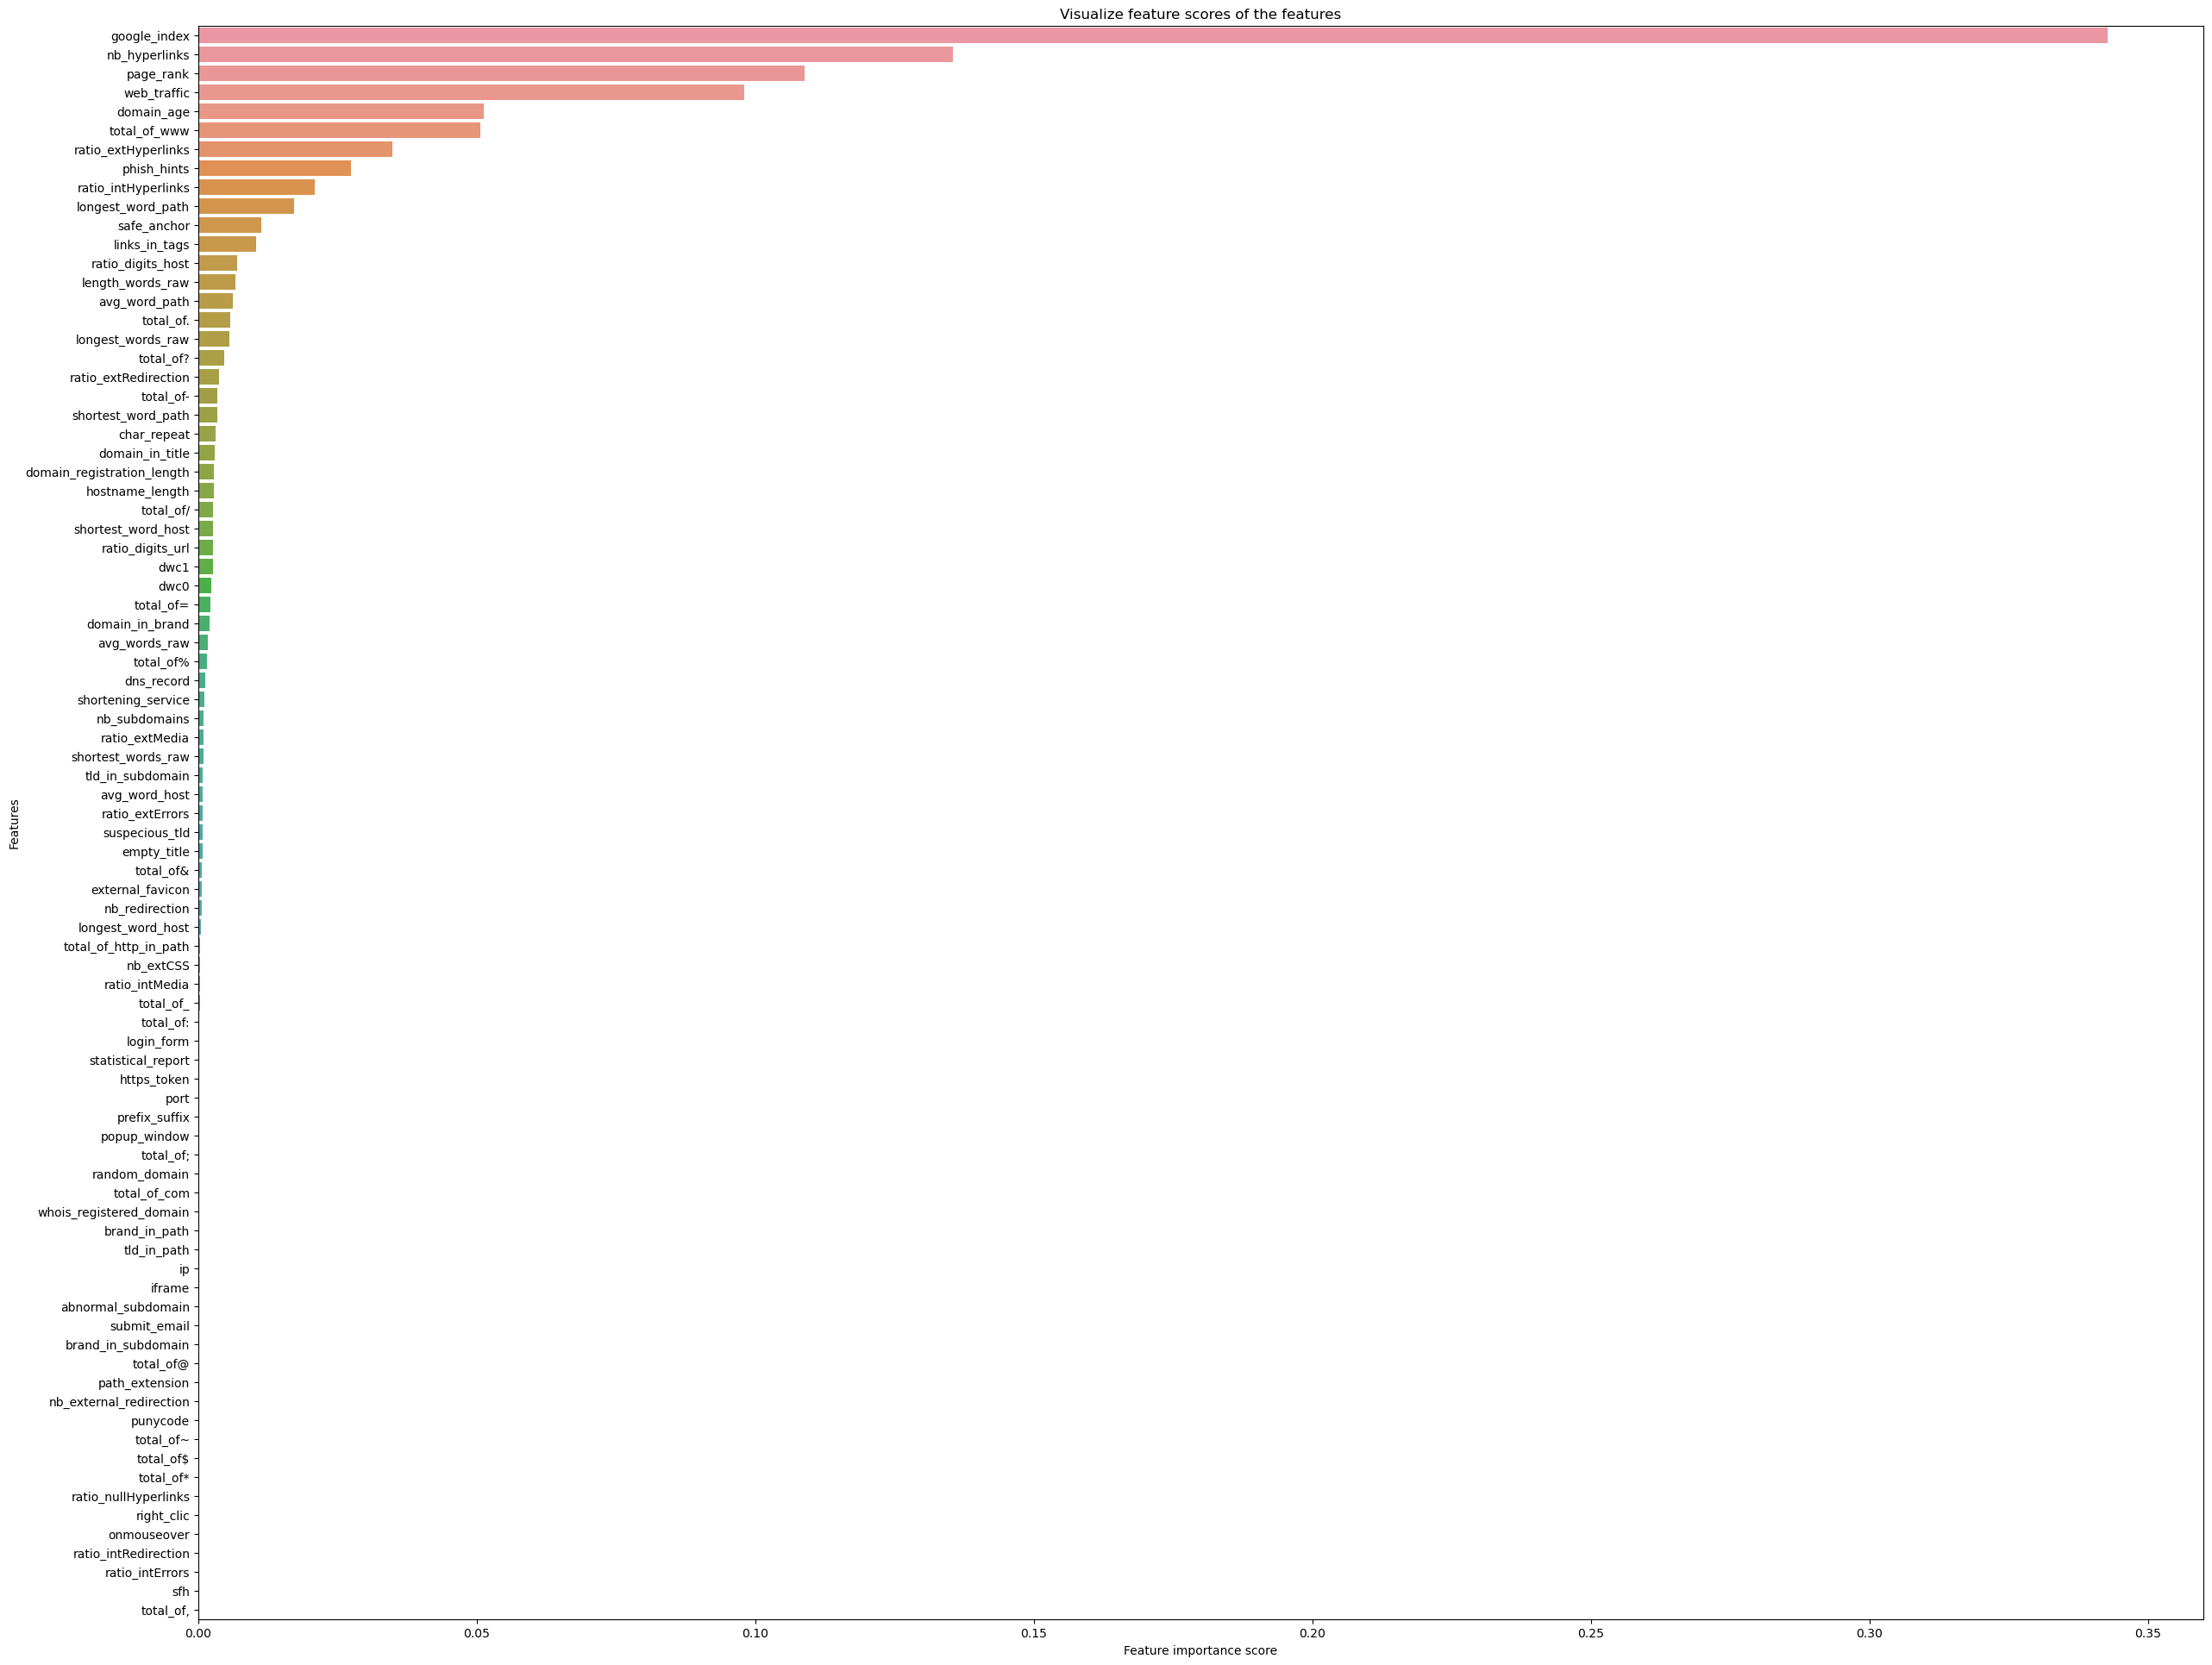

In [25]:
# Visualize feature scores
pd.set_option('display.max_rows', 10)
f, ax = plt.subplots(figsize=(30, 24))
ax = sb.barplot(x=feature_scores, y=feature_scores.index, data=phishdata)
ax.set_title("Visualize feature scores of the features")
ax.set_yticklabels(feature_scores.index)
ax.set_xlabel("Feature importance score")
ax.set_ylabel("Features")
plt.show()

In [26]:
# drop unnecessary features
selected_feature= X_train.columns[sel]
X_train_selected = X_train[selected_feature]
selected_feature= X_test.columns[sel]
X_test_selected = X_test[selected_feature]

In [27]:
# check accuracy
clf = RandomForestClassifier(random_state=0, n_estimators=100, max_depth=5,max_features=20)
clf.fit(X_test, y_test)
accuracy_score(y_test, clf.predict(X_test))#accuracy improved

D:\Anaconda3\Lib\site-packages\sklearn\base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


0.9593158849442861

# Output

In [28]:
selected_feat

Index(['total_of_www', 'longest_word_path', 'phish_hints', 'nb_hyperlinks',
       'ratio_intHyperlinks', 'ratio_extHyperlinks', 'domain_age',
       'web_traffic', 'google_index', 'page_rank'],
      dtype='object')

In [29]:
# Clean dataset with 10 features
new_df = pd.DataFrame()
new_df['url'] = phishdata['url']
for i in selected_feat:
   new_df[i] = phishdata[i]
new_df['status'] = phishdata['status']

In [30]:
new_df

,url,total_of_www,longest_word_path,phish_hints,nb_hyperlinks,ratio_intHyperlinks,ratio_extHyperlinks,domain_age,web_traffic,google_index,page_rank,status
0,http://www.progarchives.com/album.asp?id=61737,1,5,0,143,0.930070,0.069930,6678,78526,0,5,phishing
1,http://signin.eday.co.uk.ws.edayisapi.dllsign....,0,0,2,0,0.000000,0.000000,65,0,1,0,phishing
2,http://www.avevaconstruction.com/blesstool/ima...,1,9,0,3,1.000000,0.000000,1707,0,1,0,phishing
3,http://www.jp519.com/,1,0,0,404,0.962871,0.037129,1331,0,0,0,legitimate
4,https://www.velocidrone.com/,1,0,0,57,0.684211,0.315789,1662,312044,0,4,legitimate
...,...,...,...,...,...,...,...,...,...,...,...,...
15429,http://www.dmega.co.kr/dmega/data/qna/sec/page...,1,26,0,92,1.000000,0.000000,5186,10408014,1,1,phishing
15430,http://www.answers.com/Q/What_are_the_sizes_of...,1,8,0,66,0.848485,0.151515,8829,2635,1,6,legitimate
15431,http://www.fontspace.com/category/blackletter,1,11,0,199,0.884422,0.115578,5396,3980,0,6,legitimate
15432,http://www.budgetbots.com/server.php/Server%20...,1,8,0,3,1.000000,0.000000,6728,0,1,0,phishing


In [31]:
new_df.to_csv('cleandataset.csv', index=False)